# Task1 : Apply Exploratory Data Analysis (Univariate and Bivariate) on the dataset available.


In [1]:
import pandas as pd

df=pd.read_csv("/kaggle/input/vehiclesdataset/dataset.csv")
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


In [2]:
df.shape

(112634, 17)

In [3]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

# UNIVARIATE ANALYSIS

In [4]:
print(df.describe(include='all'))

        VIN (1-10)  County     City   State    Postal Code     Model Year  \
count       112634  112634   112634  112634  112634.000000  112634.000000   
unique        7548     165      629      45            NaN            NaN   
top     5YJYGDEE9M    King  Seattle      WA            NaN            NaN   
freq           472   59000    20305  112348            NaN            NaN   
mean           NaN     NaN      NaN     NaN   98156.226850    2019.003365   
std            NaN     NaN      NaN     NaN    2648.733064       2.892364   
min            NaN     NaN      NaN     NaN    1730.000000    1997.000000   
25%            NaN     NaN      NaN     NaN   98052.000000    2017.000000   
50%            NaN     NaN      NaN     NaN   98119.000000    2020.000000   
75%            NaN     NaN      NaN     NaN   98370.000000    2022.000000   
max            NaN     NaN      NaN     NaN   99701.000000    2023.000000   

          Make    Model           Electric Vehicle Type  \
count   112634  

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

In [6]:
#check for missing values

print(df.isnull().sum())

VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                 20
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 286
DOL Vehicle ID                                         0
Vehicle Location                                      24
Electric Utility                                     443
2020 Census Tract                                      0
dtype: int64


In [7]:
# fix column names by stripping any leading/trailing spaces
df.columns = df.columns.str.strip()

# Now fill the missing values 
df['Model'] = df['Model'].fillna(df['Model'].mode()[0])
df['Legislative District'] = df['Legislative District'].fillna('Unknown')
df['Vehicle Location'] = df['Vehicle Location'].fillna('Unknown')
df['Electric Utility'] = df['Electric Utility'].fillna('Unknown')

# Check for remaining missing values
print(df.isnull().sum())


VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64


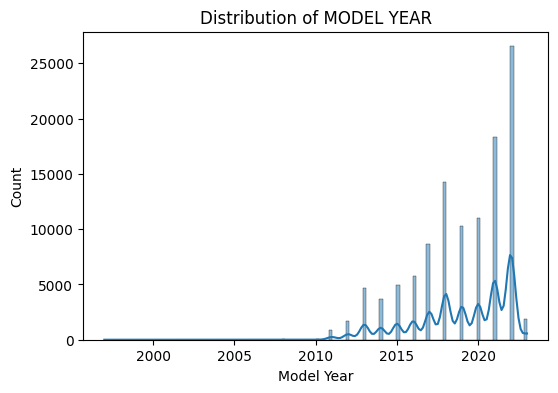

In [8]:
# Distribution od 'Model Year' - Numerical column
# Histogram

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(6,4))
sns.histplot(df['Model Year'], kde=True)
plt.title('Distribution of MODEL YEAR')
plt.show()

### Observation: 

1. There is an increasing trend in the count of vehicles from the year '2010'. Means dataset has more vehicles from recent model years.
2. Highest peak was observed from the year 2021, suggests that more Electric Vehicles from the dataset are quite recent. This might be due to availability, new models and more production.
3. In earlier i.e before 2010 , EVs were either less popular or less productive or less available.


In [9]:
df['Make'].value_counts()

Make
TESLA             52078
NISSAN            12880
CHEVROLET         10182
FORD               5819
BMW                4680
KIA                4483
TOYOTA             4405
VOLKSWAGEN         2514
AUDI               2332
VOLVO              2288
CHRYSLER           1794
HYUNDAI            1412
JEEP               1152
RIVIAN              885
FIAT                822
PORSCHE             818
HONDA               792
MINI                632
MITSUBISHI          588
POLESTAR            558
MERCEDES-BENZ       506
SMART               273
JAGUAR              219
LINCOLN             168
CADILLAC            108
LUCID MOTORS         65
SUBARU               59
LAND ROVER           38
LEXUS                33
FISKER               20
GENESIS              18
AZURE DYNAMICS        7
TH!NK                 3
BENTLEY               3
Name: count, dtype: int64

In [10]:
df['Make'].value_counts().index

Index(['TESLA', 'NISSAN', 'CHEVROLET', 'FORD', 'BMW', 'KIA', 'TOYOTA',
       'VOLKSWAGEN', 'AUDI', 'VOLVO', 'CHRYSLER', 'HYUNDAI', 'JEEP', 'RIVIAN',
       'FIAT', 'PORSCHE', 'HONDA', 'MINI', 'MITSUBISHI', 'POLESTAR',
       'MERCEDES-BENZ', 'SMART', 'JAGUAR', 'LINCOLN', 'CADILLAC',
       'LUCID MOTORS', 'SUBARU', 'LAND ROVER', 'LEXUS', 'FISKER', 'GENESIS',
       'AZURE DYNAMICS', 'TH!NK', 'BENTLEY'],
      dtype='object', name='Make')

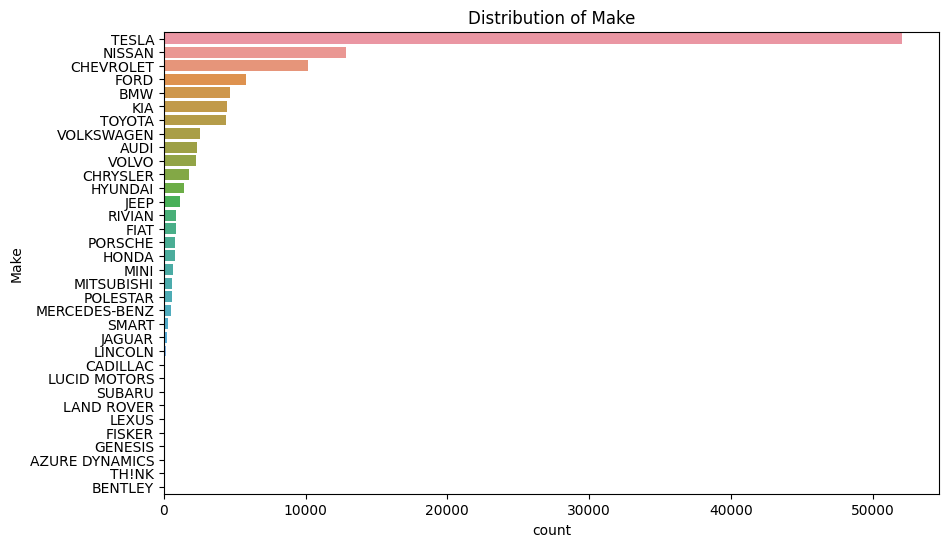

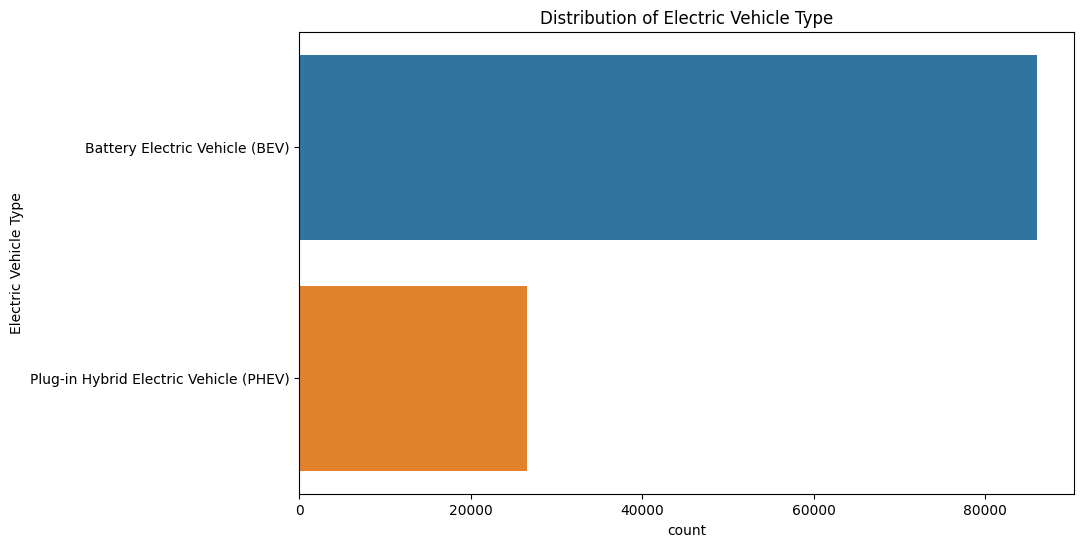

In [11]:
# count plot for categorical columns

catgeory_cols = ['Make','Electric Vehicle Type'] 

for col in catgeory_cols:
    plt.figure(figsize=(10,6))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.show()

### Observation1: Distribution of 'Make' or 'Brand'
1. Tesla, is the top brand with the highest count of 50,000+ than any other brands.
2. Among top 3 brands, after Tesla, Nissan and Chevrolet are the next most frequent makes.
3. Mid-Tier Brands: Ford, BMW, and Kia with counts ranging from about 5,000 to 10,000.
4. Toyota, Volkswagen, Audi, and Volvo have a moderate presence, with counts ranging between 2,000 to 5,000.
5. Low-Tier Brands: The bottom of the graph contains various other brands like Honda, Porsche, Jaguar, and Bentley, which have very low counts, some barely reaching 500.
6. Rare Brands: Brands like Azure Dynamics, Think, and Bentley have very low counts.

### Observation2: Distribution of 'Electric Vehicle Type'
1. The count of BEVs is over 80,000, indicating that they are the preferred choice among electric vehicle types in this dataset.
2. Plug-in Hybrid Electric Vehicles (PHEVs) have a much lower count, around 20,000.
3. This shows the consumer behaviour favoring zero-emission vehicles.

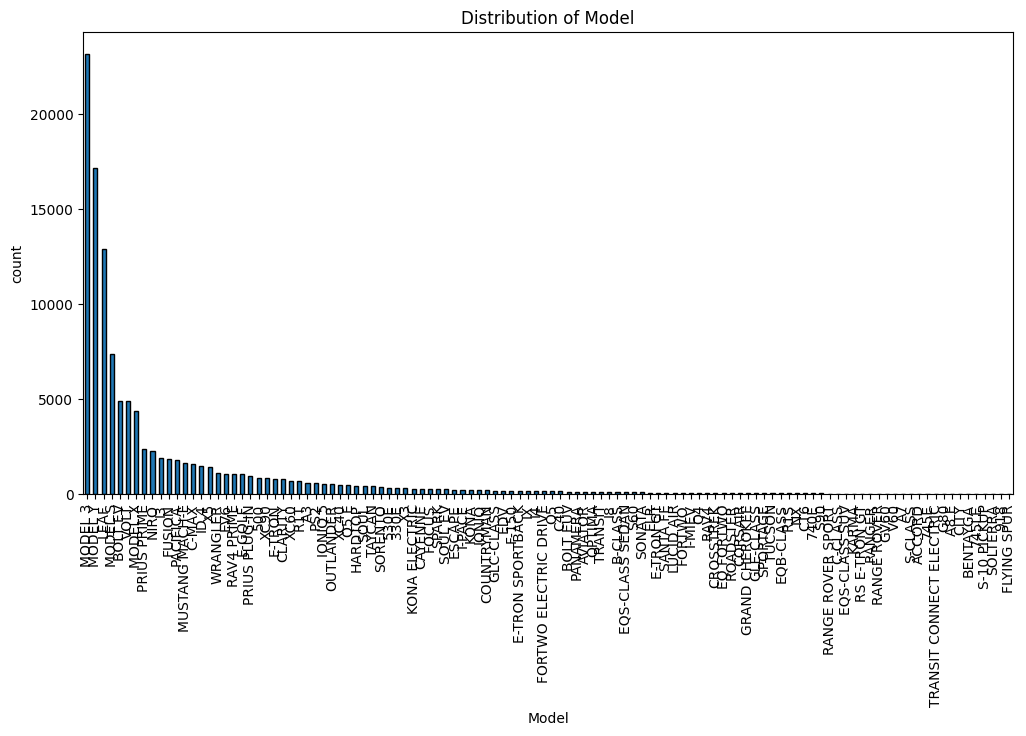

In [12]:
plt.figure(figsize=(12, 6))
df['Model'].value_counts().plot(kind='bar',edgecolor='black')
plt.title('Distribution of Model')
plt.xlabel('Model')
plt.ylabel('count')
plt.show()

### Observation : 
1. Long Tail Distribution: The graph exhibits a long tail effect, where a few models dominate sales while many others have counts below 5,000, indicating a diverse market with few best-sellers.
2. The distribution shows consumer preferences in the electric vehicle market,many models struggle to achieve significant sales figures.
3. The "MODEL 3" is the most popular, exceeding 20,000 counts.

# BIVARIATE ANALYSIS

In [13]:
mean_msrp = df.groupby('Make')['Base MSRP'].mean().reset_index()
print(mean_msrp)

              Make      Base MSRP
0             AUDI       0.000000
1   AZURE DYNAMICS       0.000000
2          BENTLEY       0.000000
3              BMW    5545.128205
4         CADILLAC   11125.185185
5        CHEVROLET       0.000000
6         CHRYSLER    2652.957079
7             FIAT       0.000000
8           FISKER  102000.000000
9             FORD       0.000000
10         GENESIS       0.000000
11           HONDA       0.000000
12         HYUNDAI       0.000000
13          JAGUAR       0.000000
14            JEEP       0.000000
15             KIA    4642.371180
16      LAND ROVER       0.000000
17           LEXUS       0.000000
18         LINCOLN       0.000000
19    LUCID MOTORS       0.000000
20   MERCEDES-BENZ       0.000000
21            MINI    8750.000000
22      MITSUBISHI       0.000000
23          NISSAN       0.000000
24        POLESTAR       0.000000
25         PORSCHE    5621.882641
26          RIVIAN       0.000000
27           SMART       0.000000
28          SU

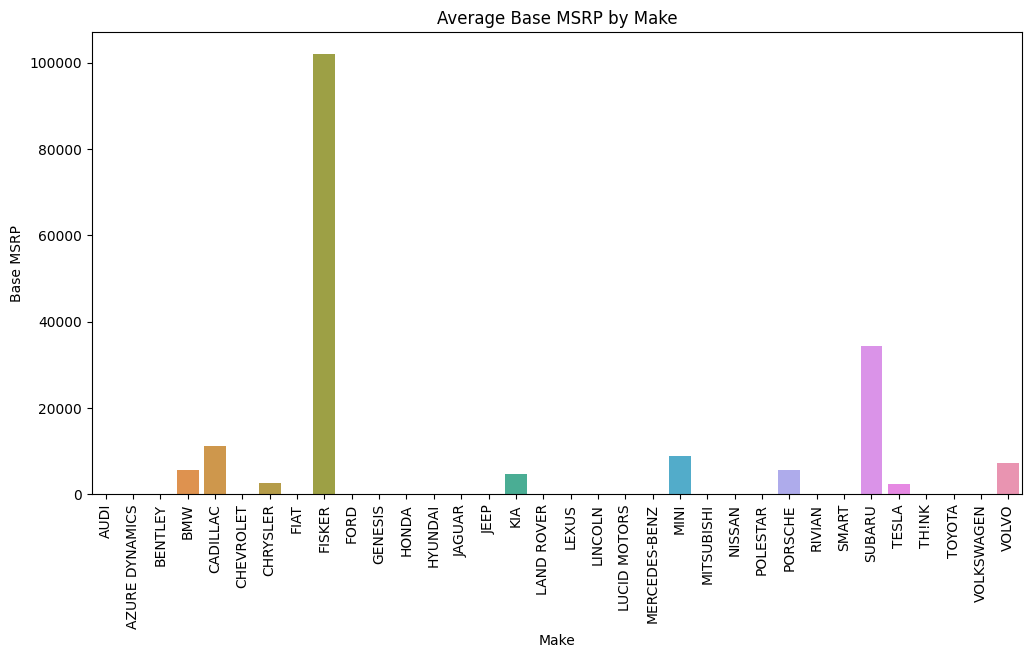

In [14]:
plt.figure(figsize=(12, 6))
mean_msrp = df.groupby('Make')['Base MSRP'].mean().reset_index()
sns.barplot(x='Make', y='Base MSRP', data=mean_msrp)
plt.xticks(rotation=90)
plt.title('Average Base MSRP by Make')
plt.show()

### Observation:

1. Fisker has high base MSRP compared to all other car makes,exceeding 100,000 units.
2. Subaru and Smart also have higher average base MSRP values compared to most other brands in the chart,though they are significantly lower than Fisker's.
3. The majority of the car makes such as Audi, Chevrolet, Honda, and others have relatively low average base MSRPs, mostly clustered below 20,000 units.

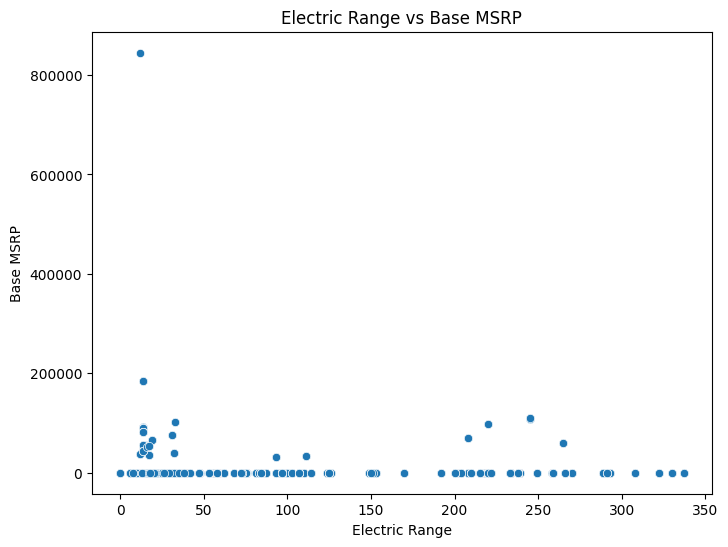

In [15]:
# Scatter plot of 'Electric Range' vs 'Base MSRP'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Electric Range', y='Base MSRP', data=df)
plt.title('Electric Range vs Base MSRP')
plt.show()

### Observation : 
1. The majority of the data points are clustered at the lower end of both the electric range (0-50 miles) and base MSRP (under 50,000 units), suggesting that many cars have shorter electric ranges and lower base prices.
2. There are a few significant outliers, one with a base MSRP over 800,000 and another between 200,000-400,000, despite having relatively low electric ranges (under 50 miles). These are likely luxury or high-end models.
3. The scatter plot shows no strong linear correlation between electric range and base MSRP. There are vehicles with both high and low MSRP values at various electric ranges, indicating that other factors might influence pricing.

In [17]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

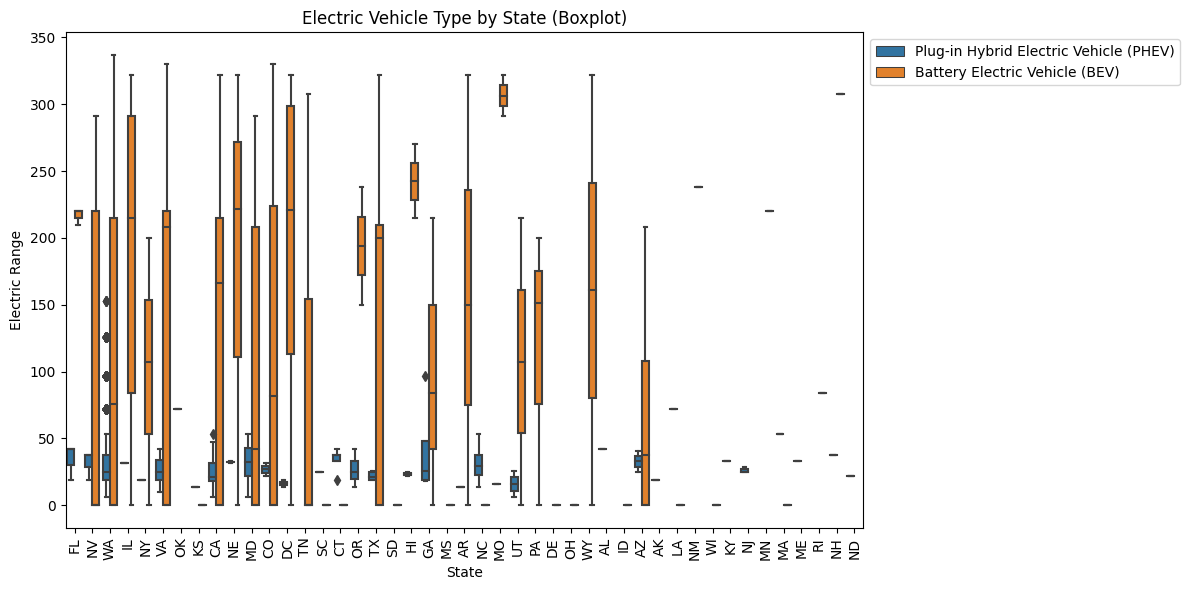

In [21]:
plt.figure(figsize=(12,6))
sns.boxplot(x='State', y='Electric Range', hue='Electric Vehicle Type', data=df)

plt.xticks(rotation=90)
plt.title('Electric Vehicle Type by State (Boxplot)')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()  # Adjust the layout to fit everything
plt.show()


### Observation: 
1. The orange boxplots (BEV) generally have higher ranges compared to PHEVs in most states. BEVs exhibit a wide variation in electric range across states, with some states having higher median ranges and larger interquartile ranges.
2. The blue boxplots (PHEV) show significantly lower electric ranges. Most of the PHEVs have ranges under 50 miles, and there is less variation in range compared to BEVs.
3. States like California (CA) and New York (NY) have a broad distribution of electric ranges for BEVs, suggesting a wide variety of models with different ranges.
4. In contrast, other states like Alaska (AK) and North Dakota (ND) show fewer data points and lower ranges, reflecting less adoption of high-range electric vehicles in those states.
5. Some outliers exist, particularly for BEVs, which suggests that a few vehicles in certain states have electric ranges significantly higher than the norm.

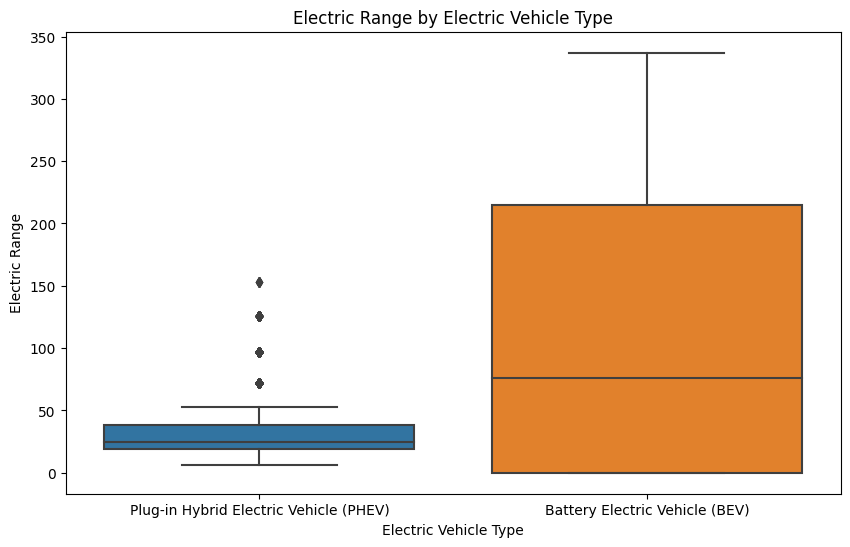

In [22]:
# Boxplot of 'Electric Range' by 'Electric Vehicle Type'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Electric Vehicle Type', y='Electric Range', data=df)
plt.title('Electric Range by Electric Vehicle Type')
plt.show()

### Observation:
1. BEVs generally have a significantly higher electric range than Plug-in Hybrid Electric Vehicles (PHEV), with the median electric range for BEVs being much higher, around 200 miles.
2. The range of PHEVs is much more concentrated, with most vehicles falling between 0 and 50 miles. There are some outliers that go beyond 100 miles, but the typical range is lower than that of BEVs.
3. BEVs exhibit a wider range of electric range values, with some vehicles having ranges up to approximately 350 miles. This variability indicates that BEV technology is more diverse in terms of range offerings compared to PHEVs.

# Task 2 : Create a Choropleth using plotly.express to display the number of EV vehicles based on location.

In [23]:
#! pip install plotly

In [24]:
import plotly.express as px

In [25]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [26]:
# Group by State and Model Year to get count of EVs per year and per state
state_ev_count = df.groupby(['State', 'Model Year']).size().reset_index(name='EV Count')

# Creating Choropleth using Plotly Express to display number of EV vehicles based on state
fig = px.choropleth(
    state_ev_count,
    locations='State',
    locationmode='USA-states',
    color='EV Count',
    animation_frame='Model Year',
    scope="usa",
    title='Number of EV Vehicles by State',
    color_continuous_scale='Blues'
)

fig.show()

# Task 3:  Create a Racing Bar Plot to display the animation of EV Make and its count each year.

In [29]:
! pip install bar-chart-race

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 kB 3.2 MB/s eta 0:00:0000:01


In [30]:
import bar_chart_race as bcr

In [31]:
# Group by 'Model Year' and 'Make' to get the count of EVs per make and year
make_ev_count = df.groupby(['Model Year', 'Make']).size().reset_index(name='EV Count')
print(make_ev_count)
print('')
# Pivot the DataFrame to wide format where each 'Make' is a column
wide_df = make_ev_count.pivot(index='Model Year', columns='Make', values='EV Count').fillna(0)
print(wide_df)

     Model Year        Make  EV Count
0          1997   CHEVROLET         1
1          1998        FORD         1
2          1999        FORD         3
3          2000        FORD        10
4          2002      TOYOTA         2
..          ...         ...       ...
204        2023    POLESTAR        88
205        2023      SUBARU         1
206        2023       TESLA       890
207        2023  VOLKSWAGEN        69
208        2023       VOLVO        21

[209 rows x 3 columns]

Make         AUDI  AZURE DYNAMICS  BENTLEY    BMW  CADILLAC  CHEVROLET  \
Model Year                                                               
1997          0.0             0.0      0.0    0.0       0.0        1.0   
1998          0.0             0.0      0.0    0.0       0.0        0.0   
1999          0.0             0.0      0.0    0.0       0.0        0.0   
2000          0.0             0.0      0.0    0.0       0.0        0.0   
2002          0.0             0.0      0.0    0.0       0.0        0.0   
2

In [33]:
import bar_chart_race as bcr

# Create racing bar plot using bar_chart_race
bcr.bar_chart_race(
    df=wide_df,
    filename='ev_race.mp4',  # Save as an MP4 video file
    orientation='h',  # Horizontal bars
    sort='desc',  # Sort by the count in descending order
    n_bars=10,  # Number of bars to display in each frame
    title='Electric Vehicle Make Count Over the Years',
    # Adjust the position and style of the period label
    period_label={'x': .95, 'y': .15,
                  'ha': 'right',
                  'va': 'center',
                  'size': 30,
                  'weight': 'semibold'
                  },
    # Adjust the style of bars
    bar_kwargs={'alpha': .99, 'lw': 0},
    steps_per_period=45,  # Number of frames per period (smoothness)
    period_length=4000,  # Duration of each year in milliseconds
    interpolate_period=False,  # Do not interpolate the values
    period_fmt='{x:.0f}',  # Format for the year label
)


In [34]:
!pip install ipython

In [35]:
from IPython.display import Video

# Path to the video file
video_path = '/kaggle/working/ev_race.mp4'

# Display the video
Video(video_path, embed=True)
